LS-Nikko 동제련 박용선

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the Cookbook.

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

## Object Creation

In [2]:
# See the Data Structure Intro section.

# Creating a Series by passing a list of values, letting pandas create a default integer index:

s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.569262,1.094152,0.049732,0.406801
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598
2013-01-03,-0.267108,0.327898,-0.951150,0.414437
2013-01-04,-0.353788,0.212618,-2.481906,-0.035437
2013-01-05,-0.175000,0.760012,0.947470,-0.035920
2013-01-06,-1.598457,0.078901,-0.924661,-0.748686


In [16]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.

df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [18]:
# The columns of the resulting DataFrame have different dtypes.
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [19]:
# If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

df2.<TAB>

# As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

SyntaxError: invalid syntax (<ipython-input-19-0dcc8c0311bb>, line 3)

## Viewing Data

In [20]:
# See the Basics section.

# Here is how to view the top and bottom rows of the frame:

df.head()

,A,B,C,D
2013-01-01,0.569262,1.094152,0.049732,0.406801
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598
2013-01-03,-0.267108,0.327898,-0.951150,0.414437
2013-01-04,-0.353788,0.212618,-2.481906,-0.035437
2013-01-05,-0.175000,0.760012,0.947470,-0.035920


In [21]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.353788,0.212618,-2.481906,-0.035437
2013-01-05,-0.175000,0.760012,0.947470,-0.035920
2013-01-06,-1.598457,0.078901,-0.924661,-0.748686


In [22]:
# Display the index, columns:

df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [25]:
# DataFrame.to_numpy() gives a NumPy representation of the underlying data. Note that his can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

# For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data.

df.to_numpy()

array([[ 0.56926241,  1.09415218,  0.04973242,  0.40680137],
       [-0.28107069, -0.66037232,  1.30636727, -0.26859768],
       [-0.26710808,  0.32789843, -0.9511497 ,  0.41443653],
       [-0.35378781,  0.21261841, -2.48190614, -0.03543654],
       [-0.1750002 ,  0.76001164,  0.9474696 , -0.03591992],
       [-1.59845682,  0.07890056, -0.92466071, -0.74868552]])

In [27]:
# For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

df2.to_numpy()

# Note DataFrame.to_numpy() does not include the index or column labels in the output.

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [29]:
# describe() shows a quick statistic summary of your data:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.351027,0.302201,-0.342358,-0.044567
std,0.699420,0.603635,1.401646,0.438303
min,-1.598457,-0.660372,-2.481906,-0.748686
25%,-0.335609,0.112330,-0.944527,-0.210428
50%,-0.274089,0.270258,-0.437464,-0.035678
75%,-0.198027,0.651983,0.723035,0.296242
max,0.569262,1.094152,1.306367,0.414437


In [30]:
# Transposing your data:

df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.569262,-0.281071,-0.267108,-0.353788,-0.175000,-1.598457
B,1.094152,-0.660372,0.327898,0.212618,0.760012,0.078901
C,0.049732,1.306367,-0.951150,-2.481906,0.947470,-0.924661
D,0.406801,-0.268598,0.414437,-0.035437,-0.035920,-0.748686


In [35]:
# Sorting by an axis:

df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.406801,0.049732,1.094152,0.569262
2013-01-02,-0.268598,1.306367,-0.660372,-0.281071
2013-01-03,0.414437,-0.951150,0.327898,-0.267108
2013-01-04,-0.035437,-2.481906,0.212618,-0.353788
2013-01-05,-0.035920,0.947470,0.760012,-0.175000
2013-01-06,-0.748686,-0.924661,0.078901,-1.598457


In [36]:
# Sorting by values:

df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598
2013-01-06,-1.598457,0.078901,-0.924661,-0.748686
2013-01-04,-0.353788,0.212618,-2.481906,-0.035437
2013-01-03,-0.267108,0.327898,-0.951150,0.414437
2013-01-05,-0.175000,0.760012,0.947470,-0.035920
2013-01-01,0.569262,1.094152,0.049732,0.406801


## Sorting by values:

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing.


## Getting

In [37]:
# Selecting a single column, which yields a Series, equivalent to df.A:

df['A']

2013-01-01    0.569262
2013-01-02   -0.281071
2013-01-03   -0.267108
2013-01-04   -0.353788
2013-01-05   -0.175000
2013-01-06   -1.598457
Freq: D, Name: A, dtype: float64

In [38]:
# Selecting via [], which slices the rows.
df[0:3]

,A,B,C,D
2013-01-01,0.569262,1.094152,0.049732,0.406801
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598
2013-01-03,-0.267108,0.327898,-0.951150,0.414437


In [39]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598
2013-01-03,-0.267108,0.327898,-0.951150,0.414437
2013-01-04,-0.353788,0.212618,-2.481906,-0.035437


## Selection by Label

In [40]:
# See more in Selection by Label.

# For getting a cross section using a label:

In [41]:
df.loc[dates[0]]

A    0.569262
B    1.094152
C    0.049732
D    0.406801
Name: 2013-01-01 00:00:00, dtype: float64

In [43]:
# Selecting on a multi-axis by label:

df.loc[:,['A','B']]

,A,B
2013-01-01,0.569262,1.094152
2013-01-02,-0.281071,-0.660372
2013-01-03,-0.267108,0.327898
2013-01-04,-0.353788,0.212618
2013-01-05,-0.175000,0.760012
2013-01-06,-1.598457,0.078901


In [48]:
# Showing label slicing, both endpoints are included:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.281071,-0.660372
2013-01-03,-0.267108,0.327898
2013-01-04,-0.353788,0.212618


In [50]:
# Reduction in the dimensions of the returned object:

df.loc['20130102', ['A','B']]

A   -0.281071
B   -0.660372
Name: 2013-01-02 00:00:00, dtype: float64

In [55]:
# For getting a scalar value:

df.loc[dates[0],'A']

0.5692624133665383

In [56]:
# For getting fast access to a scalar (equivalent to the prior method
df.at[dates[0],'A']

0.5692624133665383

## Selection by Position

In [57]:
# See more in Selection by Position.

# Select via the position of the passed integers:

In [58]:
df.iloc[3]

A   -0.353788
B    0.212618
C   -2.481906
D   -0.035437
Name: 2013-01-04 00:00:00, dtype: float64

In [59]:
# By integer slices, acting similar to numpy/python:

df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.353788,0.212618
2013-01-05,-0.175000,0.760012


In [61]:
# By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.281071,1.306367
2013-01-03,-0.267108,-0.951150
2013-01-05,-0.175000,0.947470


In [62]:
# For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598
2013-01-03,-0.267108,0.327898,-0.951150,0.414437


In [63]:
# For slicing columns explicitly:
df.iloc[:,1:3]

,B,C
2013-01-01,1.094152,0.049732
2013-01-02,-0.660372,1.306367
2013-01-03,0.327898,-0.951150
2013-01-04,0.212618,-2.481906
2013-01-05,0.760012,0.947470
2013-01-06,0.078901,-0.924661


In [64]:
# For getting a value explicitly:
df.iloc[1,1]

-0.6603723181786758

In [65]:
# For getting fast access to a scalar (equivalent to the prior method):
df.iat[1,1]

-0.6603723181786758

## Boolean Indexing

In [66]:
# Using a single column’s values to select data.

df[df.A > 0]

,A,B,C,D
2013-01-01,0.569262,1.094152,0.049732,0.406801


In [68]:
# Selecting values from a DataFrame where a boolean condition is met.

df[df>0]

,A,B,C,D
2013-01-01,0.569262,1.094152,0.049732,0.406801
2013-01-02,NaN,NaN,1.306367,NaN
2013-01-03,NaN,0.327898,NaN,0.414437
2013-01-04,NaN,0.212618,NaN,NaN
2013-01-05,NaN,0.760012,0.947470,NaN
2013-01-06,NaN,0.078901,NaN,NaN


In [71]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.569262,1.094152,0.049732,0.406801,one
2013-01-02,-0.281071,-0.660372,1.306367,-0.268598,one
2013-01-03,-0.267108,0.327898,-0.951150,0.414437,two
2013-01-04,-0.353788,0.212618,-2.481906,-0.035437,three
2013-01-05,-0.175000,0.760012,0.947470,-0.035920,four
2013-01-06,-1.598457,0.078901,-0.924661,-0.748686,three


In [75]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.267108,0.327898,-0.95115,0.414437,two
2013-01-05,-0.175000,0.760012,0.94747,-0.035920,four


## Setting

In [79]:
# Setting a new column automatically aligns the data by the indexes.

s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [80]:
df['F'] = s1

In [81]:
#Setting values by label:
df.at[dates[0], 'A'] = 0

In [82]:
#Setting values by position:
df.iat[0,1] = 0

In [84]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5]*len(df))

In [87]:
# The result of the prior setting operations.
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.049732,5,NaN
2013-01-02,-0.281071,-0.660372,1.306367,5,1.0
2013-01-03,-0.267108,0.327898,-0.951150,5,2.0
2013-01-04,-0.353788,0.212618,-2.481906,5,3.0
2013-01-05,-0.175000,0.760012,0.947470,5,4.0
2013-01-06,-1.598457,0.078901,-0.924661,5,5.0


In [88]:
# A where operation with setting.

df2 = df.copy()

In [89]:
df2[df2 > 0] = -df2

In [90]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.049732,-5,NaN
2013-01-02,-0.281071,-0.660372,-1.306367,-5,-1.0
2013-01-03,-0.267108,-0.327898,-0.951150,-5,-2.0
2013-01-04,-0.353788,-0.212618,-2.481906,-5,-3.0
2013-01-05,-0.175000,-0.760012,-0.947470,-5,-4.0
2013-01-06,-1.598457,-0.078901,-0.924661,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section.

In [92]:
# Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [93]:
df1.loc[dates[0]:dates[1], 'E'] = 1

In [94]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.049732,5,NaN,1.0
2013-01-02,-0.281071,-0.660372,1.306367,5,1.0,1.0
2013-01-03,-0.267108,0.327898,-0.951150,5,2.0,NaN
2013-01-04,-0.353788,0.212618,-2.481906,5,3.0,NaN


In [95]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.281071,-0.660372,1.306367,5,1.0,1.0


In [96]:
# Filling missing data.

df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.049732,5,5.0,1.0
2013-01-02,-0.281071,-0.660372,1.306367,5,1.0,1.0
2013-01-03,-0.267108,0.327898,-0.951150,5,2.0,5.0
2013-01-04,-0.353788,0.212618,-2.481906,5,3.0,5.0


In [97]:
# To get the boolean mask where values are nan.

pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations
See the Basic section on Binary Ops.

### Stats

In [102]:
# Operations in general exclude missing data.

# Performing a descriptive statistic:
df.mean()

A   -0.445904
B    0.119843
C   -0.342358
D    5.000000
F    3.000000
dtype: float64

In [101]:
# Same operation on the other axis:

df.mean(1)

2013-01-01    1.262433
2013-01-02    1.272985
2013-01-03    1.221928
2013-01-04    1.075385
2013-01-05    2.106496
2013-01-06    1.511157
Freq: D, dtype: float64

In [105]:
# Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [106]:
    s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [107]:
df.sub(s, axis ='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.267108,-0.672102,-1.951150,4.0,1.0
2013-01-04,-3.353788,-2.787382,-5.481906,2.0,0.0
2013-01-05,-5.175000,-4.239988,-4.052530,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [108]:
#Applying functions to the data:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.049732,5,NaN
2013-01-02,-0.281071,-0.660372,1.356100,10,1.0
2013-01-03,-0.548179,-0.332474,0.404950,15,3.0
2013-01-04,-0.901967,-0.119855,-2.076956,20,6.0
2013-01-05,-1.076967,0.640156,-1.129487,25,10.0
2013-01-06,-2.675424,0.719057,-2.054147,30,15.0


In [109]:
df.apply(lambda x: x.max() - x.min())

A    1.598457
B    1.420384
C    3.788273
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [114]:
# See more at Histogramming and Discretization.

s = pd.Series(np.random.randint(0, 7, size = 10))

In [115]:
s

0    6
1    3
2    0
3    2
4    1
5    1
6    6
7    3
8    2
9    5
dtype: int32

In [116]:
s.value_counts()

6    2
3    2
2    2
1    2
5    1
0    1
dtype: int64

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [118]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [119]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the Merging section.

Concatenating pandas objects together with concat():

In [120]:
df = pd.DataFrame(np.random.randn(10,4))

In [121]:
df

,0,1,2,3
0,-2.381583,-0.436349,-2.072412,-1.295440
1,-0.464024,-0.057027,0.275930,1.494515
2,0.566821,-2.303374,1.377001,-1.187387
3,0.079393,0.107969,0.506951,1.125589
4,-1.008052,0.354829,-0.702668,0.113451
5,-1.041134,-0.686599,-2.559448,0.946311
6,0.790672,0.680002,0.716606,0.477705
7,-0.666240,0.084480,-0.338760,0.705921
8,-1.601761,0.393248,-0.601658,1.837978
9,-0.019942,0.421248,-0.195309,-0.216272


In [122]:
pieces = [df[:3],df[3:7],df[7:]]

In [124]:
pd.concat(pieces)

,0,1,2,3
0,-2.381583,-0.436349,-2.072412,-1.295440
1,-0.464024,-0.057027,0.275930,1.494515
2,0.566821,-2.303374,1.377001,-1.187387
3,0.079393,0.107969,0.506951,1.125589
4,-1.008052,0.354829,-0.702668,0.113451
5,-1.041134,-0.686599,-2.559448,0.946311
6,0.790672,0.680002,0.716606,0.477705
7,-0.666240,0.084480,-0.338760,0.705921
8,-1.601761,0.393248,-0.601658,1.837978
9,-0.019942,0.421248,-0.195309,-0.216272


### Join

In [126]:
# SQL style merges. See the Database style joining section.

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [127]:
left

,key,lval
0,foo,1
1,foo,2


In [128]:
right

,key,rval
0,foo,4
1,foo,5


In [129]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [130]:
# Another example that can be given is:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [131]:
left

,key,lval
0,foo,1
1,bar,2


In [132]:
right

,key,rval
0,foo,4
1,bar,5


In [133]:
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [134]:
# Append rows to a dataframe. See the Appending section.
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [135]:
df

,A,B,C,D
0,-0.688253,0.004733,0.424690,-0.200903
1,-0.757834,-2.269099,-0.956570,0.194815
2,-1.423738,-1.345367,-0.358772,0.604724
3,0.637806,-0.559486,0.056201,-0.107883
4,0.088974,-0.415847,1.884001,-1.877014
5,-0.866173,1.525180,0.387493,-0.052762
6,0.112464,-0.886748,-0.833716,1.996931
7,0.679221,0.959657,-0.026457,1.809550


In [136]:
s = df.iloc[3]

In [137]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.688253,0.004733,0.424690,-0.200903
1,-0.757834,-2.269099,-0.956570,0.194815
2,-1.423738,-1.345367,-0.358772,0.604724
3,0.637806,-0.559486,0.056201,-0.107883
4,0.088974,-0.415847,1.884001,-1.877014
5,-0.866173,1.525180,0.387493,-0.052762
6,0.112464,-0.886748,-0.833716,1.996931
7,0.679221,0.959657,-0.026457,1.809550
8,0.637806,-0.559486,0.056201,-0.107883


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure
See the Grouping section.

In [140]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

In [141]:
df

,A,B,C,D
0,foo,one,0.599105,0.774901
1,bar,one,0.373661,-0.685052
2,foo,two,1.866601,1.791686
3,bar,three,0.619730,-0.532343
4,foo,two,1.215426,-0.450677
5,bar,two,-1.754797,1.128106
6,foo,one,-2.750727,-0.078431
7,foo,three,-1.161531,-2.772218


In [143]:
# Grouping and then applying the sum() function to the resulting groups.

df.groupby('A').sum()

,C,D
A,,
bar,-0.761406,-0.089289
foo,-0.231125,-0.734741


In [144]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.373661 -0.685052
    three  0.619730 -0.532343
    two   -1.754797  1.128106
foo one   -2.151622  0.696469
    three -1.161531 -2.772218
    two    3.082027  1.341008

## Reshaping

### Stack

In [145]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [149]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])

In [154]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])
df

A         B
first second                    
bar   one    -0.245720  1.337134
      two    -1.021854 -2.131597
baz   one     0.089173 -0.070407
      two    -1.475935 -0.132252
foo   one     0.393331  2.425063
      two    -1.670282 -0.915824
qux   one    -1.754394  1.397202
      two    -1.598104 -0.309737

In [152]:
df2 = df[:4]

In [155]:
df2

A         B
first second                    
bar   one    -1.154931  0.723258
      two     0.258623  0.026451
baz   one     0.146070 -0.555847
      two    -0.096274 -0.994946

In [156]:
# The stack() method “compresses” a level in the DataFrame’s columns.

stacked = df2.stack()

In [157]:
stacked

first  second   
bar    one     A   -1.154931
               B    0.723258
       two     A    0.258623
               B    0.026451
baz    one     A    0.146070
               B   -0.555847
       two     A   -0.096274
               B   -0.994946
dtype: float64

In [158]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

stacked.unstack()

A         B
first second                    
bar   one    -1.154931  0.723258
      two     0.258623  0.026451
baz   one     0.146070 -0.555847
      two    -0.096274 -0.994946

In [159]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.154931  0.258623
      B  0.723258  0.026451
baz   A  0.146070 -0.096274
      B -0.555847 -0.994946

In [160]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.154931  0.146070
       B  0.723258 -0.555847
two    A  0.258623 -0.096274
       B  0.026451 -0.994946

## Pivot Tables

In [162]:
# See the section on Pivot Tables.
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df


,A,B,C,D,E
0,one,A,foo,0.548018,-0.629764
1,one,B,foo,0.095662,-0.765578
2,two,C,foo,-1.592038,-0.148118
3,three,A,bar,0.699488,0.904920
4,one,B,bar,0.112924,0.305685
5,one,C,bar,-0.769786,-1.269400
6,two,A,foo,0.303859,1.256213
7,three,B,foo,-1.297711,-0.686447
8,one,C,foo,-0.329887,-2.194461
9,one,A,bar,-0.966898,0.529666


In [167]:
# We can produce pivot tables from this data very easily:

pd.pivot_table(df, values=['D'], index=['A','B'], columns = ['C'])

D          
C             bar       foo
A     B                    
one   A -0.966898  0.548018
      B  0.112924  0.095662
      C -0.769786 -0.329887
three A  0.699488       NaN
      B       NaN -1.297711
      C -1.964264       NaN
two   A       NaN  0.303859
      B  0.552272       NaN
      C       NaN -1.592038

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [175]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
len(rng)

100

In [174]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00     35
2012-01-01 00:00:01    415
2012-01-01 00:00:02    275
2012-01-01 00:00:03    247
2012-01-01 00:00:04    242
2012-01-01 00:00:05    180
2012-01-01 00:00:06    425
2012-01-01 00:00:07    378
2012-01-01 00:00:08    462
2012-01-01 00:00:09    306
2012-01-01 00:00:10    302
2012-01-01 00:00:11     71
2012-01-01 00:00:12     49
2012-01-01 00:00:13    178
2012-01-01 00:00:14    232
2012-01-01 00:00:15     77
2012-01-01 00:00:16    186
2012-01-01 00:00:17    332
2012-01-01 00:00:18    355
2012-01-01 00:00:19      2
2012-01-01 00:00:20    121
2012-01-01 00:00:21    491
2012-01-01 00:00:22     61
2012-01-01 00:00:23    316
2012-01-01 00:00:24    146
2012-01-01 00:00:25     35
2012-01-01 00:00:26    386
2012-01-01 00:00:27     55
2012-01-01 00:00:28    352
2012-01-01 00:00:29     63
                      ... 
2012-01-01 00:01:10     23
2012-01-01 00:01:11    426
2012-01-01 00:01:12    486
2012-01-01 00:01:13    355
2012-01-01 00:01:14    263
2012-01-01 00:01:15    333
2

In [171]:
ts.resample('5Min').sum()

2012-01-01    26975
Freq: 5T, dtype: int32

In [176]:
# Time zone representation:

rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [177]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [178]:
ts

2012-03-06    1.046369
2012-03-07   -0.407329
2012-03-08   -1.934709
2012-03-09   -0.496435
2012-03-10    0.270299
Freq: D, dtype: float64

In [179]:
ts_utc=ts.tz_localize('UTC')

In [180]:
ts_utc

2012-03-06 00:00:00+00:00    1.046369
2012-03-07 00:00:00+00:00   -0.407329
2012-03-08 00:00:00+00:00   -1.934709
2012-03-09 00:00:00+00:00   -0.496435
2012-03-10 00:00:00+00:00    0.270299
Freq: D, dtype: float64

In [181]:
# Converting to another time zone:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.046369
2012-03-06 19:00:00-05:00   -0.407329
2012-03-07 19:00:00-05:00   -1.934709
2012-03-08 19:00:00-05:00   -0.496435
2012-03-09 19:00:00-05:00    0.270299
Freq: D, dtype: float64

In [182]:
# Converting between time span representations:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [183]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [184]:
ts

2012-01-31   -0.605154
2012-02-29   -1.115408
2012-03-31    0.784945
2012-04-30   -0.596245
2012-05-31    0.194377
Freq: M, dtype: float64

In [185]:
ps = ts.to_period()

In [186]:
ps

2012-01   -0.605154
2012-02   -1.115408
2012-03    0.784945
2012-04   -0.596245
2012-05    0.194377
Freq: M, dtype: float64

In [187]:
ps.to_timestamp()

2012-01-01   -0.605154
2012-02-01   -1.115408
2012-03-01    0.784945
2012-04-01   -0.596245
2012-05-01    0.194377
Freq: MS, dtype: float64

In [188]:
# Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

prng = pd.period_range('1990Q1','2000Q4',freq='Q-NOV')

In [189]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [190]:
ts.index = (prng.asfreq('M','e') + 1 ).asfreq('H', 's') + 9

In [191]:
ts.head()

1990-03-01 09:00   -0.125292
1990-06-01 09:00   -1.271061
1990-09-01 09:00    0.516565
1990-12-01 09:00    0.402166
1991-03-01 09:00    0.237354
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [192]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [193]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [194]:
# Convert the raw grades to a categorical data type.

df["grade"] = df["raw_grade"].astype("category")

In [195]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [196]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

df["grade"].cat.categories = ["very good", "good", "very bad"]

In [199]:
# Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [200]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [201]:
# Sorting is per order in the categories, not lexical order.

df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [203]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [205]:
# See the Plotting docs.

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))

In [207]:
ts = ts.cumsum()

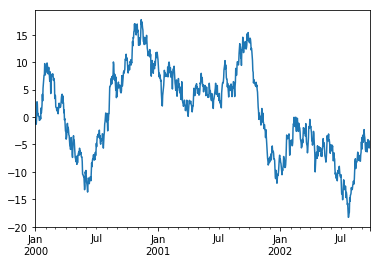

In [210]:
ts.plot()


In [212]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

df = pd.DataFrame(np.random.randn(1000,4), index = ts.index, columns = ['A','B','C','D'])


In [221]:
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-0.141435,0.930824,0.413883,1.653061
2000-01-02,-1.067445,1.597853,0.165353,1.827394
2000-01-03,-1.704871,1.302524,-1.046321,2.229877
2000-01-04,-3.105151,1.936840,-0.019492,3.144190
2000-01-05,-4.036550,2.332430,0.014476,3.651559
2000-01-06,-3.265941,1.847145,0.020103,2.312491
2000-01-07,-1.473141,2.481567,-0.566127,2.348357
2000-01-08,-2.481788,3.046606,-1.002743,1.539532
2000-01-09,-2.225948,3.117155,-0.045711,3.149868
2000-01-10,-4.656177,1.841479,-0.152284,1.926309


<Figure size 432x288 with 0 Axes>

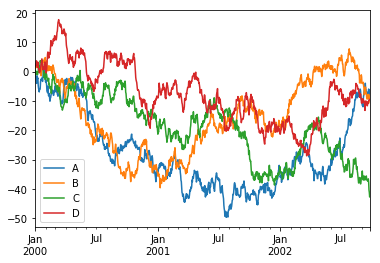

In [225]:
import matplotlib.pyplot as plt

plt.figure()
df.plot()
plt.legend(loc='best')

## Getting Data In/Out

### CSV

In [226]:
# Writing to a csv file.

df.to_csv('foo.csv')

In [228]:
# Reading from a csv file.

pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.141435,0.930824,0.413883,1.653061
1,2000-01-02,-1.067445,1.597853,0.165353,1.827394
2,2000-01-03,-1.704871,1.302524,-1.046321,2.229877
3,2000-01-04,-3.105151,1.936840,-0.019492,3.144190
4,2000-01-05,-4.036550,2.332430,0.014476,3.651559
5,2000-01-06,-3.265941,1.847145,0.020103,2.312491
6,2000-01-07,-1.473141,2.481567,-0.566127,2.348357
7,2000-01-08,-2.481788,3.046606,-1.002743,1.539532
8,2000-01-09,-2.225948,3.117155,-0.045711,3.149868
9,2000-01-10,-4.656177,1.841479,-0.152284,1.926309


### HDF5

In [229]:
# Reading and writing to HDFStores.

# Writing to a HDF5 Store.

df.to_hdf('foo.h5', 'df')

In [230]:
# Reading from a HDF5 Store.

pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.141435,0.930824,0.413883,1.653061
2000-01-02,-1.067445,1.597853,0.165353,1.827394
2000-01-03,-1.704871,1.302524,-1.046321,2.229877
2000-01-04,-3.105151,1.936840,-0.019492,3.144190
2000-01-05,-4.036550,2.332430,0.014476,3.651559
2000-01-06,-3.265941,1.847145,0.020103,2.312491
2000-01-07,-1.473141,2.481567,-0.566127,2.348357
2000-01-08,-2.481788,3.046606,-1.002743,1.539532
2000-01-09,-2.225948,3.117155,-0.045711,3.149868
2000-01-10,-4.656177,1.841479,-0.152284,1.926309


### Excel

In [231]:
# Reading and writing to MS Excel.

# Writing to an excel file.

df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [232]:
# Reading from an excel file.
pd.read_excel('foo.xlsx', 'Sheet1', index_col = None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.141435,0.930824,0.413883,1.653061
1,2000-01-02,-1.067445,1.597853,0.165353,1.827394
2,2000-01-03,-1.704871,1.302524,-1.046321,2.229877
3,2000-01-04,-3.105151,1.936840,-0.019492,3.144190
4,2000-01-05,-4.036550,2.332430,0.014476,3.651559
5,2000-01-06,-3.265941,1.847145,0.020103,2.312491
6,2000-01-07,-1.473141,2.481567,-0.566127,2.348357
7,2000-01-08,-2.481788,3.046606,-1.002743,1.539532
8,2000-01-09,-2.225948,3.117155,-0.045711,3.149868
9,2000-01-10,-4.656177,1.841479,-0.152284,1.926309


## Gotchas

In [234]:
# If you are attempting to perform an operation you might see an exception like:

if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().